# Data Analysis
## Data Libraries Importing and Dataset Loading

In [191]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, recall_score
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import OneHotEncoder
from imblearn.over_sampling import SMOTE

## Dataset Preparation and Loading

In [193]:
df = pd.read_csv("bigml_59c28831336c6604c800002a.csv")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   state                   3333 non-null   object 
 1   account length          3333 non-null   int64  
 2   area code               3333 non-null   int64  
 3   phone number            3333 non-null   object 
 4   international plan      3333 non-null   object 
 5   voice mail plan         3333 non-null   object 
 6   number vmail messages   3333 non-null   int64  
 7   total day minutes       3333 non-null   float64
 8   total day calls         3333 non-null   int64  
 9   total day charge        3333 non-null   float64
 10  total eve minutes       3333 non-null   float64
 11  total eve calls         3333 non-null   int64  
 12  total eve charge        3333 non-null   float64
 13  total night minutes     3333 non-null   float64
 14  total night calls       3333 non-null   

## Irrelevant Data featues dropping

### This is irrelevant in the prediction due to its unique values per customer.

In [195]:
df = df.drop(columns=["phone number"])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 20 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   state                   3333 non-null   object 
 1   account length          3333 non-null   int64  
 2   area code               3333 non-null   int64  
 3   international plan      3333 non-null   object 
 4   voice mail plan         3333 non-null   object 
 5   number vmail messages   3333 non-null   int64  
 6   total day minutes       3333 non-null   float64
 7   total day calls         3333 non-null   int64  
 8   total day charge        3333 non-null   float64
 9   total eve minutes       3333 non-null   float64
 10  total eve calls         3333 non-null   int64  
 11  total eve charge        3333 non-null   float64
 12  total night minutes     3333 non-null   float64
 13  total night calls       3333 non-null   int64  
 14  total night charge      3333 non-null   

## Conversion fo Categorical Values to Numerical values.

### This offers valid approach for some models.


In [197]:
df["day_charge_per_minute"] = df["total day charge"] / df["total day minutes"].replace(0, np.nan)
df["day_charge_per_minute"] = df["day_charge_per_minute"].fillna(df["day_charge_per_minute"].mean())
df["service_calls_intensity"] = df["customer service calls"] / (df["account length"] / 30)


### Encoding categorical variables, dropping of high cardinality and low importance columns in the data set

In [199]:

df = pd.get_dummies(df, columns=["international plan", "voice mail plan"], drop_first=True)
df

,state,account length,area code,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,...,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn,day_charge_per_minute,service_calls_intensity,international plan_yes,voice mail plan_yes
0,KS,128,415,25,265.1,110,45.07,197.4,99,16.78,...,11.01,10.0,3,2.70,1,False,0.170011,0.234375,False,True
1,OH,107,415,26,161.6,123,27.47,195.5,103,16.62,...,11.45,13.7,3,3.70,1,False,0.169988,0.280374,False,True
2,NJ,137,415,0,243.4,114,41.38,121.2,110,10.30,...,7.32,12.2,5,3.29,0,False,0.170008,0.000000,False,False
3,OH,84,408,0,299.4,71,50.90,61.9,88,5.26,...,8.86,6.6,7,1.78,2,False,0.170007,0.714286,True,False
4,OK,75,415,0,166.7,113,28.34,148.3,122,12.61,...,8.41,10.1,3,2.73,3,False,0.170006,1.200000,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3328,AZ,192,415,36,156.2,77,26.55,215.5,126,18.32,...,12.56,9.9,6,2.67,2,False,0.169974,0.312500,False,True
3329,WV,68,415,0,231.1,57,39.29,153.4,55,13.04,...,8.61,9.6,4,2.59,3,False,0.170013,1.323529,False,False
3330,RI,28,510,0,180.8,109,30.74,288.8,58,24.55,...,8.64,14.1,6,3.81,2,False,0.170022,2.142857,False,False
3331,CT,184,510,0,213.8,105,36.35,159.6,84,13.57,...,6.26,5.0,10,1.35,2,False,0.170019,0.326087,True,False


In [200]:
df = df.drop(columns=["state", "area code"])
df

,account length,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn,day_charge_per_minute,service_calls_intensity,international plan_yes,voice mail plan_yes
0,128,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False,0.170011,0.234375,False,True
1,107,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False,0.169988,0.280374,False,True
2,137,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False,0.170008,0.000000,False,False
3,84,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False,0.170007,0.714286,True,False
4,75,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False,0.170006,1.200000,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3328,192,36,156.2,77,26.55,215.5,126,18.32,279.1,83,12.56,9.9,6,2.67,2,False,0.169974,0.312500,False,True
3329,68,0,231.1,57,39.29,153.4,55,13.04,191.3,123,8.61,9.6,4,2.59,3,False,0.170013,1.323529,False,False
3330,28,0,180.8,109,30.74,288.8,58,24.55,191.9,91,8.64,14.1,6,3.81,2,False,0.170022,2.142857,False,False
3331,184,0,213.8,105,36.35,159.6,84,13.57,139.2,137,6.26,5.0,10,1.35,2,False,0.170019,0.326087,True,False


### Train-test split Analysis

In [202]:
X = df.drop("churn", axis=1)
y = df["churn"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

### Numerical faetures data scaling

In [204]:
scaler = StandardScaler()
numeric_cols = ["account length", "number vmail messages", "total day minutes", "total day calls",
                "total day charge", "total eve minutes", "total eve calls", "total eve charge",
                "total night minutes", "total night calls", "total night charge", "total intl minutes",
                "total intl calls", "total intl charge", "customer service calls",
                "day_charge_per_minute", "service_calls_intensity"]
X_train[numeric_cols] = scaler.fit_transform(X_train[numeric_cols])
X_test[numeric_cols] = scaler.transform(X_test[numeric_cols])

### Handling Class Imbalances

In [206]:
smote = SMOTE(random_state=42)
X_train_balanced, y_train_balanced = smote.fit_resample(X_train, y_train)

## Logistical Regression

In [208]:
lr_param_grid = {"C": [0.01, 0.1, 1, 10, 100], "class_weight": ["balanced", None]}
lr_model = GridSearchCV(LogisticRegression(random_state=42), lr_param_grid, cv=5, scoring="recall")
lr_model.fit(X_train_balanced, y_train_balanced)


print("Logistic Regression Best Params:", lr_model.best_params_)
y_pred_lr = lr_model.predict(X_test)

Logistic Regression Best Params: {'C': 0.1, 'class_weight': 'balanced'}


In [209]:
print("\nLogistic Regression Performance:")



Logistic Regression Performance:


In [210]:
print(classification_report(y_test, y_pred_lr))


              precision    recall  f1-score   support

       False       0.94      0.77      0.85       855
        True       0.34      0.70      0.46       145

    accuracy                           0.76      1000
   macro avg       0.64      0.73      0.65      1000
weighted avg       0.85      0.76      0.79      1000



In [211]:
print("AUC-ROC:", roc_auc_score(y_test, lr_model.predict_proba(X_test)[:, 1]))

AUC-ROC: 0.8119943537003428


## Decision Tree

In [213]:

dt_model = DecisionTreeClassifier(max_depth=5, random_state=42)
dt_model.fit(X_train_balanced, y_train_balanced)
y_pred_dt = dt_model.predict(X_test)


In [214]:
print("\nDecision Tree Performance:")



Decision Tree Performance:


In [215]:
print(classification_report(y_test, y_pred_dt))


              precision    recall  f1-score   support

       False       0.95      0.89      0.92       855
        True       0.53      0.75      0.62       145

    accuracy                           0.87      1000
   macro avg       0.74      0.82      0.77      1000
weighted avg       0.89      0.87      0.88      1000



In [216]:
print("AUC-ROC:", roc_auc_score(y_test, dt_model.predict_proba(X_test)[:, 1]))

AUC-ROC: 0.8369388989715668


### Random Forest and Tuning

In [218]:
rf_param_grid = {"n_estimators": [100, 200], "max_depth": [5, 10], "class_weight": ["balanced", None]}
rf_model = GridSearchCV(RandomForestClassifier(random_state=42), rf_param_grid, cv=5, scoring="recall")
rf_model.fit(X_train_balanced, y_train_balanced)
print("\nRandom Forest Best Params:", rf_model.best_params_)
y_pred_rf = rf_model.predict(X_test)



Random Forest Best Params: {'class_weight': 'balanced', 'max_depth': 10, 'n_estimators': 100}


In [219]:
print("\nRandom Forest Performance:")


Random Forest Performance:


In [220]:
print(classification_report(y_test, y_pred_rf))

              precision    recall  f1-score   support

       False       0.97      0.95      0.96       855
        True       0.72      0.80      0.76       145

    accuracy                           0.93      1000
   macro avg       0.84      0.87      0.86      1000
weighted avg       0.93      0.93      0.93      1000



In [221]:
print("AUC-ROC:", roc_auc_score(y_test, rf_model.predict_proba(X_test)[:, 1]))

AUC-ROC: 0.9010364992942126


#### Visualizations 

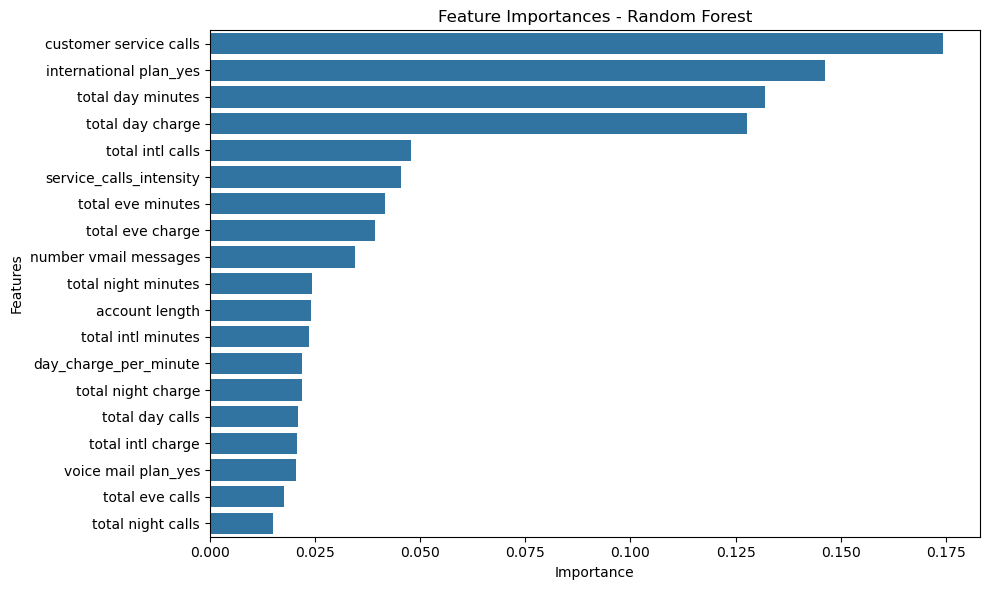

In [247]:
importances = pd.Series(
    rf_model.best_estimator_.feature_importances_,
    index=X.columns
).sort_values(ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x=importances.values, y=importances.index)
plt.title("Feature Importances - Random Forest")
plt.xlabel("Importance")
plt.ylabel("Features")
plt.tight_layout()
plt.show()
